In [152]:
pip install pyforest

In [153]:
import pyforest
titanic_train=pd.read_csv("/content/train.csv")
titanic_train.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
titanic_train.shape

(891, 12)

In [155]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [156]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

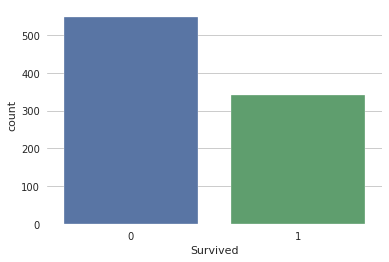

In [158]:
sns.countplot('Survived',data=titanic_train)
plt.show()

From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more

In [159]:
titanic_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

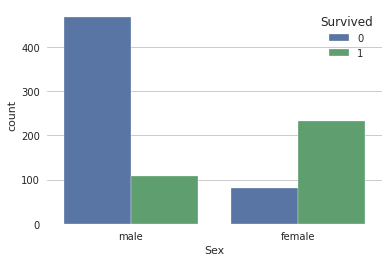

In [160]:
#countplot for male,female with respect to survived
sns.countplot('Sex',hue='Survived',data=titanic_train)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

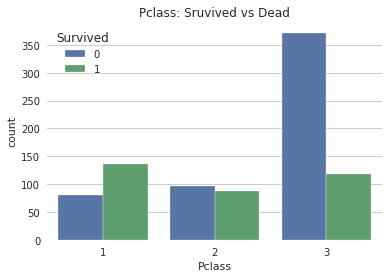

In [161]:
sns.countplot('Pclass', hue='Survived', data=titanic_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

Pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

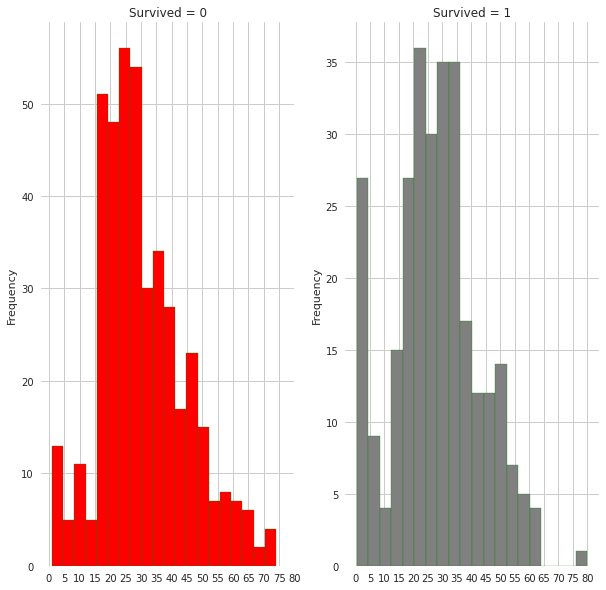

In [162]:
f,ax=plt.subplots(1,2,figsize=(10,10))
titanic_train[titanic_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='green',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic_train[titanic_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='green',color='gray')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

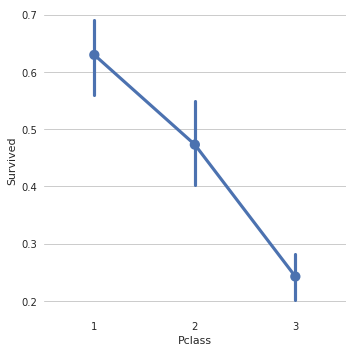

In [163]:
sns.factorplot('Pclass','Survived',data=titanic_train)
plt.show()

In [164]:
pd.crosstab([titanic_train.Sex,titanic_train.Survived],titanic_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

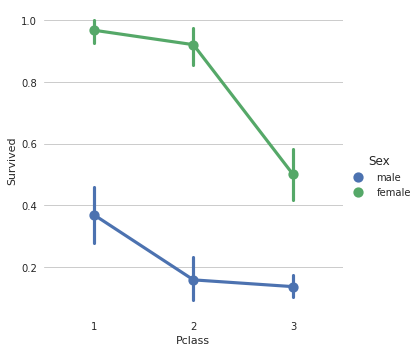

In [165]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic_train)
plt.show()

I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.

In [166]:
print('Oldest person Survived was of:',titanic_train['Age'].max())
print('Youngest person Survived was of:',titanic_train['Age'].min())
print('Average person Survived was of:',titanic_train['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

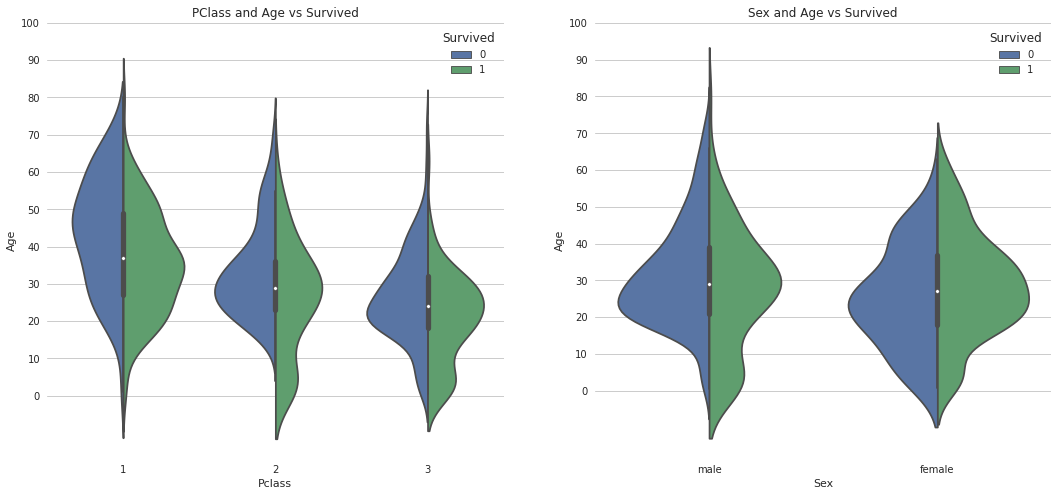

In [167]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=titanic_train,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From abovee violen plots, following observations are clear, 1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 2) Survival rate of children, for age 10 and below is good irrespective of Class 3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. 

In [168]:
titanic_train['Initial']=0
for i in titanic_train:
    titanic_train['Initial']=titanic_train.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [169]:
pd.crosstab(titanic_train.Initial,titanic_train.Sex).T.style.background_gradient(cmap='summer_r')


<IPython.core.display.Javascript object>

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [170]:
titanic_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [171]:
titanic_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [172]:
titanic_train.loc[(titanic_train.Age.isnull()) & (titanic_train.Initial=='Mr'),'Age']=33
titanic_train.loc[(titanic_train.Age.isnull()) & (titanic_train.Initial=='Mrs'),'Age']=36
titanic_train.loc[(titanic_train.Age.isnull()) & (titanic_train.Initial=='Master'),'Age']=5
titanic_train.loc[(titanic_train.Age.isnull()) & (titanic_train.Initial=='Miss'),'Age']=22
titanic_train.loc[(titanic_train.Age.isnull()) & (titanic_train.Initial=='Other'),'Age']=46

In [173]:
titanic_train.Age.isnull().any()

False

In [174]:
pd.crosstab([titanic_train.SibSp],titanic_train.Survived).style.background_gradient('summer_r')

<IPython.core.display.Javascript object>

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

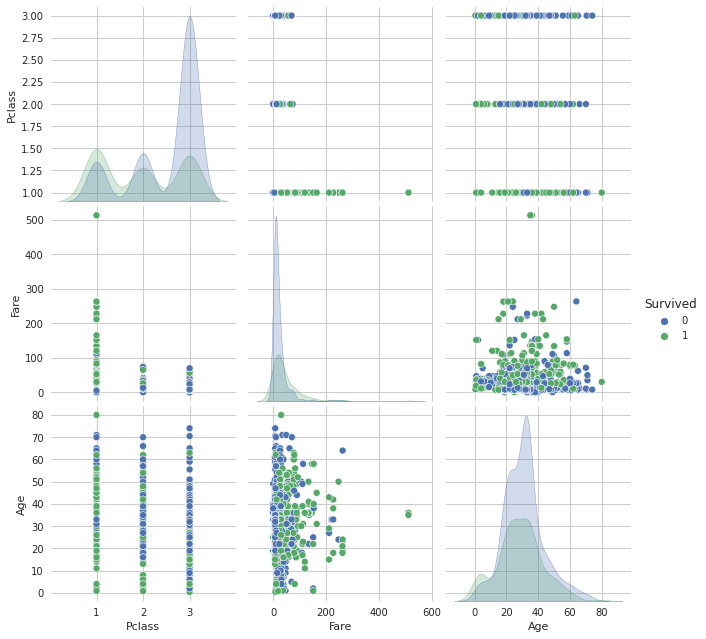

In [175]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(titanic_train[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

Observations-


From the above grid of plots we can see that, passengers who paid higher fare or travelling in upper class has a higher chances to survive.
Age is also giving some info like young persons have a higher chance to survive than old peoples.

The picture is not very clear with pair plots so lets go towards uni-variate analysis to understand what exactly is happening

<IPython.core.display.Javascript object>

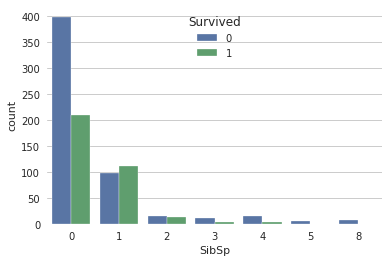

In [176]:
# Sibsp Feature
sns.countplot(titanic_train["SibSp"],hue = titanic_train["Survived"],data = titanic_train)

Observations-

Passengers who have 0 siblings mostly of them died.
Passengers with 1 sibling has equally chance for both die and survive.

But wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive. But it should be high right.. because if I were on the titanic and have 4 , 5 or 8 siblings on titanic then chances of my survival should be high right. But sadly in hard times people thinks only for themselves not for others.

<IPython.core.display.Javascript object>

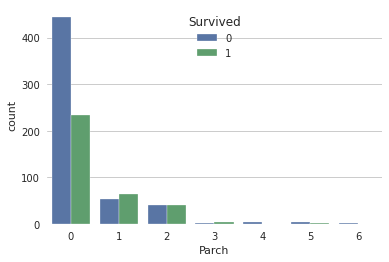

In [177]:
#Parch Feature
sns.countplot(titanic_train["Parch"],hue = titanic_train["Survived"],data = titanic_train)

Observations-

like sibsp almost Same theory is applying here.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

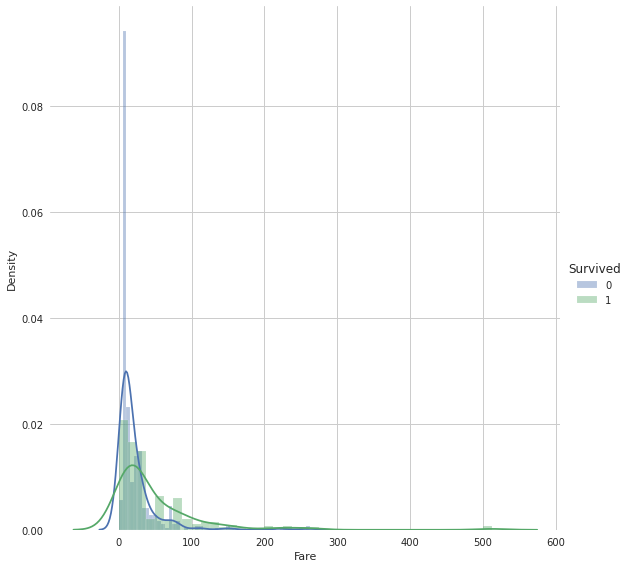

In [178]:
# Fare feature
sns.FacetGrid(titanic_train, hue="Survived", size=8)\
 .map(sns.distplot, "Fare")\
 .add_legend();
plt.show();

Observations-

Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

<IPython.core.display.Javascript object>

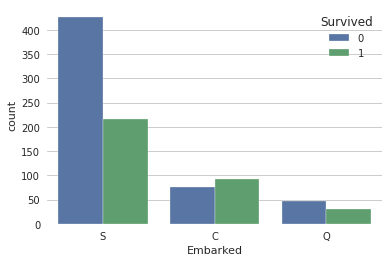

In [179]:
8. #Embarked Feature
sns.countplot(titanic_train["Embarked"],hue = titanic_train["Survived"],data = titanic_train)

Observations-

Passengers who started his journey from Southampton , most of them died.
There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

Some Important things here to know.

The Data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset. And in the cabin data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set

In [ ]:
# we can drop those 4 features from data set with this code.
titanic_train = titanic_train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)


In [185]:
titanic_train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
886,0,2,male,27.0,0,0,13.00,S,Other
887,1,1,female,19.0,0,0,30.00,S,Miss
888,0,3,female,22.0,1,2,23.45,S,Miss
889,1,1,male,26.0,0,0,30.00,C,Mr
890,0,3,male,32.0,0,0,7.75,Q,Mr


Based on the above analysis we come up with some nice facts about the Titanic disaster.